# Case Study On Landing Club 

## Business Problem Statement  
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

Use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

# Data Analysis Solution

### Reading landing case study csv file and finding basic infomation first

In [1]:
# importing all the neceseary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read the csv file

dataset_path = '/kaggle/input/loan-case-study/loan.csv'
loan_data = pd.read_csv(dataset_path, low_memory = False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Print infromation about the dataset 
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Cleaning unwanted columns and rows in dataset 
#### This activity involve following steps -
* Drop all the columns having nulls
* Drop all the columns having most of the rows nulls
* Impute the rows having nulls apply median data or zero 
* Correct the data type by cleaning up useless string and converting them to numeric
* Remove the outlier




In [4]:
# Finding nulls 
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
# Drop all the columns having nulls

print('The shape of dataframe before drops : ')
print(loan_data.shape)

loan_data = loan_data.dropna(axis = 1, how='all')

print('The shape of dataframe After drops : ')
loan_data.shape

The shape of dataframe before drops : 
(39717, 111)
The shape of dataframe After drops : 


(39717, 57)

In [6]:
# Finding the percentage of values nulls
print(round((loan_data.isnull().sum()/loan_data.shape[0])*100,2)
      .sort_values(ascending=False))


next_pymnt_d                  97.13
mths_since_last_record        92.99
mths_since_last_delinq        64.66
desc                          32.58
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
chargeoff_within_12_mths       0.14
collections_12_mths_ex_med     0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
home_ownership                 0.00
int_rate                       0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_pymnt_inv                0.00
total_rec_prncp                0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
collection_recovery_fee        0.00
term                           0.00
last_pymnt_amnt                0.00
initial_list_status            0.00
funded_amnt_inv             

In [7]:
# Droping columns which have maximum values nulls like next_pymnt_d
# columns having null more than 90% null or information not much useful
loan_data = loan_data.drop(['mths_since_last_record', 
                            'next_pymnt_d','mths_since_last_delinq',
                            'url',
                            'desc',
                            'emp_title',
                            'mths_since_last_delinq',
                            'zip_code',
                            'collections_12_mths_ex_med',
                            'chargeoff_within_12_mths',
                            'tax_liens',
                            'title'], axis=1)



In [8]:
# Finding all the columns having only one unique 
# Since they would not be useful so drop those

def is_having_one_unique_value(column_name) : 
    if len(loan_data[column_name].unique()) == 1  :
        return True
    else :
        return False

filters = filter(lambda x : is_having_one_unique_value(x), loan_data.columns.to_list())
list_cols = list(filters)
print(list_cols)

# Dropping all the columns having just one unique value becuase they are of no use
loan_data = loan_data.drop(list_cols, axis=1)        
print(round((loan_data.isnull().sum()/loan_data.shape[0])*100,2)
      .sort_values(ascending=False))
print(loan_data.shape)

['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']
emp_length                 2.71
pub_rec_bankruptcies       1.75
last_pymnt_d               0.18
revol_util                 0.13
last_credit_pull_d         0.01
total_pymnt                0.00
pub_rec                    0.00
revol_bal                  0.00
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt_inv            0.00
last_pymnt_amnt            0.00
inq_last_6mths             0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_rec_late_fee         0.00
recoveries                 0.00
collection_recovery_fee    0.00
open_acc                   0.00
id                         0.00
member_id                  0.00
sub_grade                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.0

#### Now we have only 40 columns left, out of them impute the columns having nulls

##### emp_length is work experience, which can be found out by age of employee or salary of employee.

In [9]:
# find out how data is filled in emp_length column
loan_data['emp_length'].unique()


array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [10]:
loan_data['emp_length'] = loan_data.emp_length.str.extract('(\d+)')
loan_data['emp_length'].unique()

array(['10', '1', '3', '8', '9', '4', '5', '6', '2', '7', nan],
      dtype=object)

In [11]:
# replacing na with median
loan_data.emp_length.fillna(loan_data.emp_length.median(),inplace=True)

#replacing 0 where pub_rec_bankruptcies
loan_data.pub_rec_bankruptcies.fillna(0,inplace=True)
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               39717 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [12]:
# remove % symbol from intrest rate column so that it can be used in calculations
loan_data['int_rate'] = loan_data['int_rate'].str.rstrip('%')

# remove % symbol from revol_util column so that it can be used in calculations
loan_data['revol_util'] =  loan_data['revol_util'].str.rstrip('%')

# remove months from revol_util column so that it can be used in calculations
loan_data['term'] = loan_data['term'].str.rstrip('months')

#removing rows which are having null as these are in very small % 
loan_data = loan_data.dropna(how='any',axis=0)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [13]:
# convert to the columns from object to numeric
cols_to_be_numeric = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
loan_data[cols_to_be_numeric] = loan_data[cols_to_be_numeric].apply(pd.to_numeric)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39598 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39598 non-null  int64  
 1   member_id                39598 non-null  int64  
 2   loan_amnt                39598 non-null  int64  
 3   funded_amnt              39598 non-null  int64  
 4   funded_amnt_inv          39598 non-null  float64
 5   term                     39598 non-null  object 
 6   int_rate                 39598 non-null  float64
 7   installment              39598 non-null  float64
 8   grade                    39598 non-null  object 
 9   sub_grade                39598 non-null  object 
 10  emp_length               39598 non-null  float64
 11  home_ownership           39598 non-null  object 
 12  annual_inc               39598 non-null  float64
 13  verification_status      39598 non-null  object 
 14  issue_d               

### Now data has been modified to remove nulls, we need to check the outliers in data 
* Outliers will be removed on the basis of 5% to 95% data range
* For this take each column and finding out the values to remove

<AxesSubplot:ylabel='funded_amnt'>

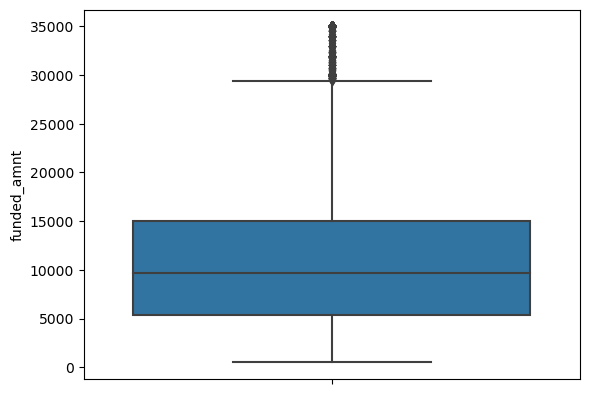

In [14]:
sns.boxplot(data= loan_data, y='funded_amnt')

In [15]:
# Removing outliers from each columns
filtered_loan_df = loan_data[loan_data.columns.difference(['id','member_id'])]


low = .05
high = .95
quant_df = filtered_loan_df.quantile([low, high])
print(quant_df)


# filtered_loan_df = filtered_loan_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
#                                     (x < quant_df.loc[high,x.name])], axis=0)

# filtered_loan_df.info
# loan_data = pd.concat([loan_data.loc[:,['id','member_id']], filtered_loan_df], axis=1)
# loan_data.info()

      annual_inc  collection_recovery_fee  delinq_2yrs    dti  emp_length  \
0.05     24000.0                  0.00000          0.0   2.14         1.0   
0.95    142000.0                  5.01674          1.0  23.84        10.0   

      funded_amnt  funded_amnt_inv  inq_last_6mths  installment  int_rate  \
0.05       2400.0      1900.000000             0.0      72.0125      6.17   
0.95      25000.0     24742.222472             3.0     763.3630     18.54   

      ...  pub_rec  pub_rec_bankruptcies  recoveries  revol_bal  total_acc  \
0.05  ...      0.0                   0.0      0.0000     340.85        7.0   
0.95  ...      1.0                   0.0    355.1865   41685.35       43.0   

       total_pymnt  total_pymnt_inv  total_rec_int  total_rec_late_fee  \
0.05   1949.772500        1464.3325       191.9500            0.000000   
0.95  30259.570003       29659.5970      7584.8685           14.924149   

      total_rec_prncp  
0.05        1391.9815  
0.95       24999.9900  

[2 ro

### Since loan status "current" is of no use so removing rows
* The idea is to do the analysis on "Full Paid", "Charged Off" data 
* We are going to find out the impact of loan status on each variable
* Further the analysis is done on single variable and two variable and multi variables.

In [16]:
loan_data = loan_data[~(loan_data.loan_status=='Current')]
loan_data 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,...,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,Jun-10,0.0
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,Jul-10,0.0
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,...,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,Jun-07,0.0
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,...,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,Jun-07,0.0


### Checking the count of fully paid vs charged off through count plot

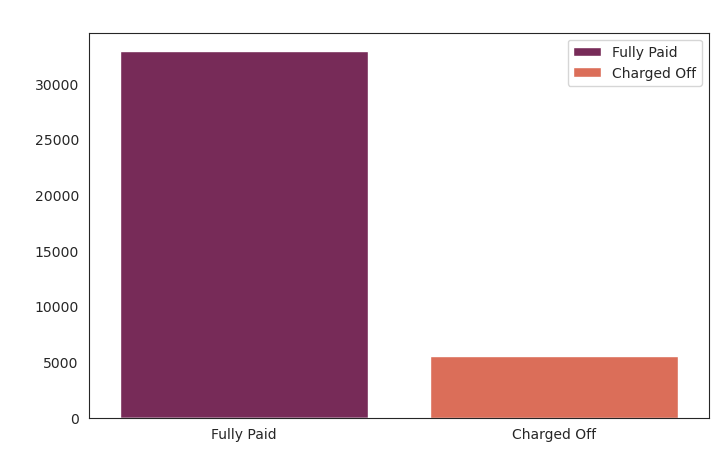

In [17]:
plt.figure(figsize=(8,5))
sns.set_style('white')
ax = sns.countplot(data = loan_data, x='loan_status',palette='rocket',dodge=False, hue='loan_status')
ax.set_title('Loan Status',fontsize=14,color='w')
ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')   
plt.legend(loc=1)
plt.show()

# Univariant Analysis 

### Finding how other objects variable affect the loan status 

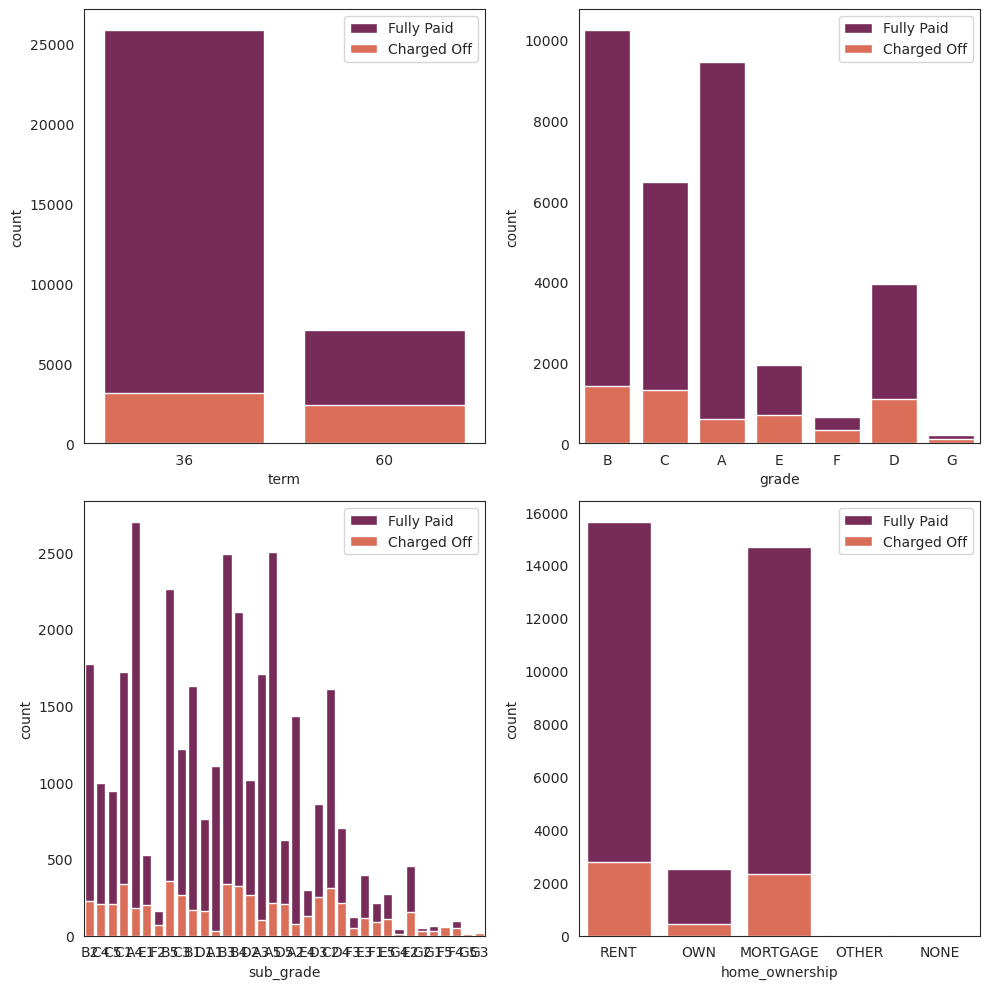

In [42]:
cols = 2
rows = 2
num_cols = ['term', 'grade', 'sub_grade', 'home_ownership']

fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    ax = sns.countplot(data = loan_data, x=col,palette='rocket',dodge=False, hue='loan_status')
    plt.legend(loc=1)
    
fig.tight_layout()  
plt.show()

# ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
#        'issue_d', 'loan_status', 'purpose', 'addr_state', 'earliest_cr_line',
#        'revol_util', 'last_pymnt_d', 'last_credit_pull_d'],
#       dtype='object')

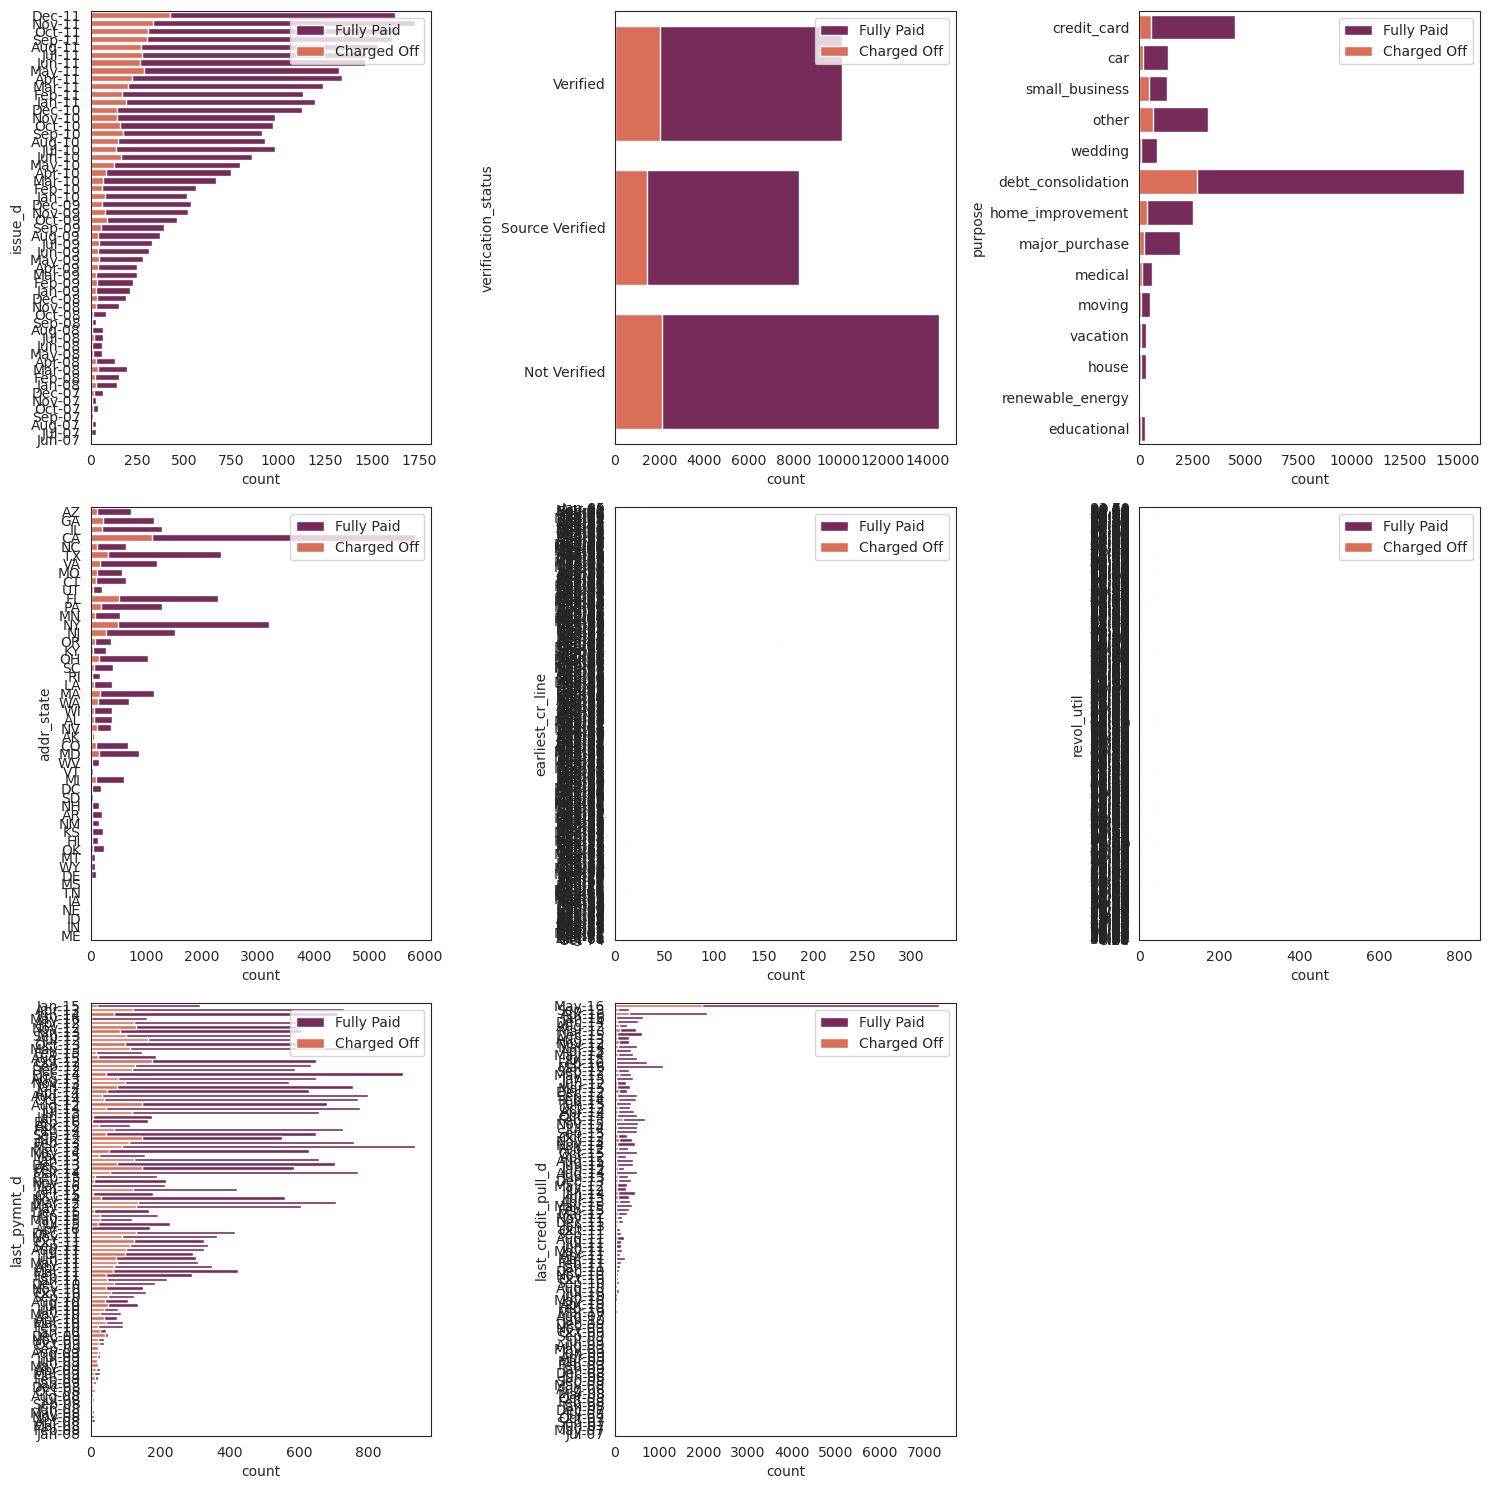

In [47]:
cols = 3
rows = 3
num_cols = ['issue_d','verification_status', 'purpose', 'addr_state', 'earliest_cr_line', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']

fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    ax = sns.countplot(data = loan_data, y=col,palette='rocket',dodge=False, hue='loan_status')
    plt.legend(loc=1)
    
fig.tight_layout()  
plt.show()

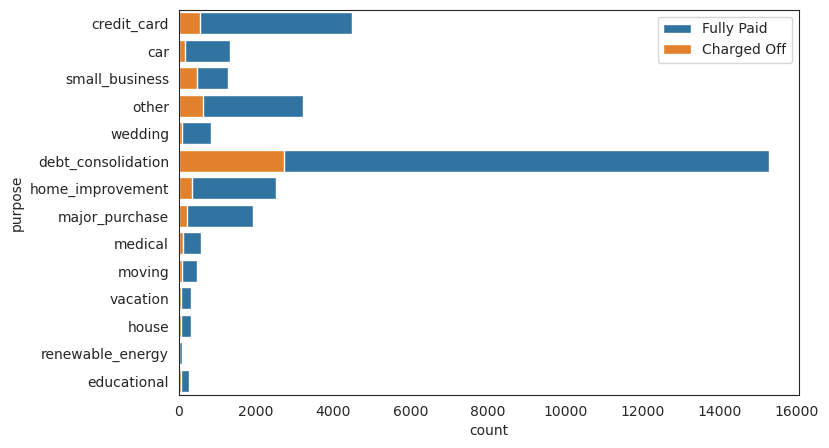

In [48]:
# Finding the purpose of loan affect the default

plt.figure(figsize=(8,5))
sns.set_style('white')
ax = sns.countplot(data = loan_data, y='purpose',dodge=False, hue='loan_status')
# ax.set_title('Loan Status',fontsize=14,color='w')
# ax.set_xlabel('Loan Status',fontsize=14,color = 'w')
# ax.set_ylabel('Loan Application Count',fontsize=14,color = 'w')   
plt.legend(loc=1)
plt.show()



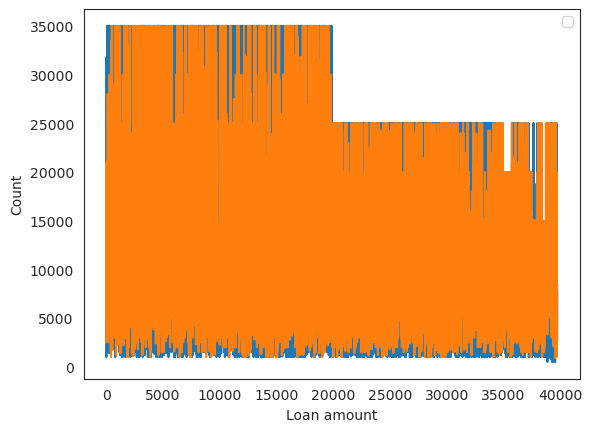

In [33]:
# univariant analysis against the loan amount 
df_fully_paid = loan_data.loc[loan_data['loan_status'] == 'Fully Paid']
df_charged_off = loan_data.loc[loan_data['loan_status'] == 'Charged Off']

# plt.plot(df_fully_paid['loan_amnt'], np.zeros_like(df_fully_paid['loan_amnt']))
# plt.plot(df_charged_off['loan_amnt'], np.zeros_like(df_charged_off['loan_amnt']))
plt.plot(df_fully_paid['loan_amnt'])
plt.plot(df_charged_off['loan_amnt'])
plt.xlabel('Loan amount')
plt.ylabel('Count')
plt.legend()
plt.show()

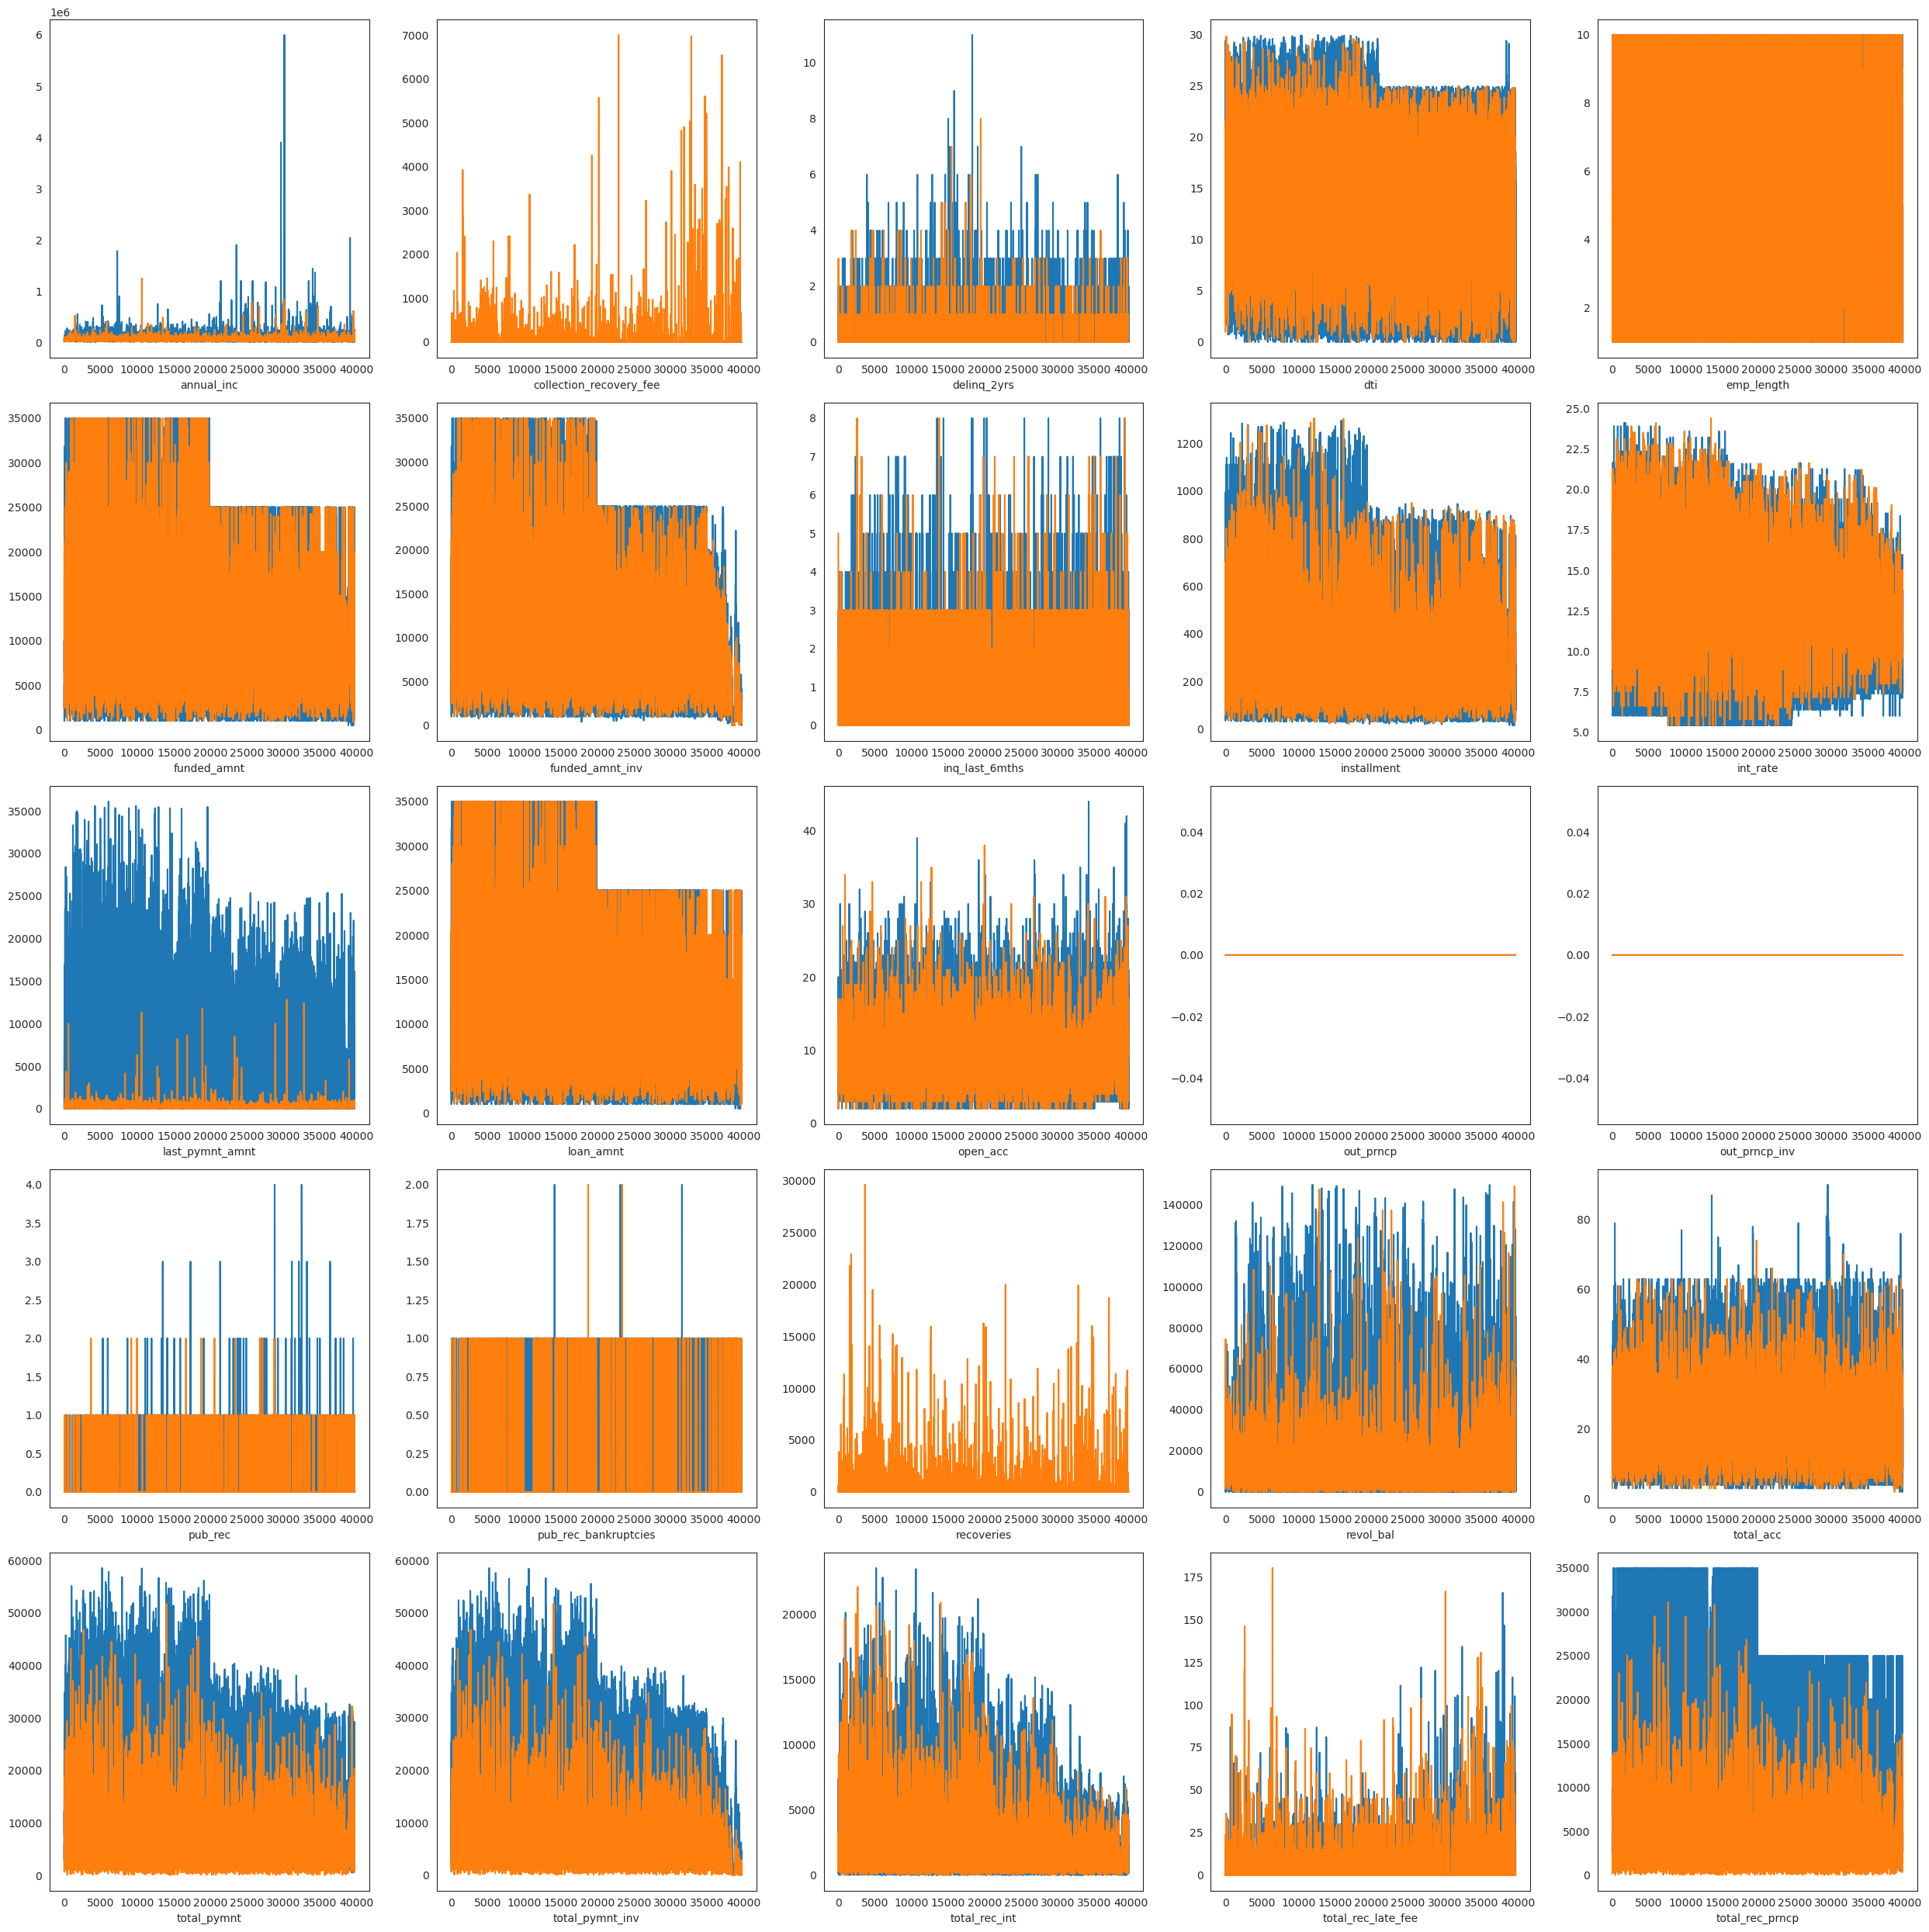

In [32]:
cols = 5
rows = 5
num_cols = loan_data.select_dtypes(exclude='object').columns.difference(['id','member_id'])
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    plt.plot(df_fully_paid[col])
    plt.plot(df_charged_off[col])
    plt.xlabel(col)
#     sns.histplot(x = loan_data[col], ax = ax)
    
fig.tight_layout()  
plt.show()

### Conclusion of Univariant
* Loan amount is not having clear demarkation so can't conclude anything

# Bivariant Analysis

<Figure size 1000x500 with 0 Axes>

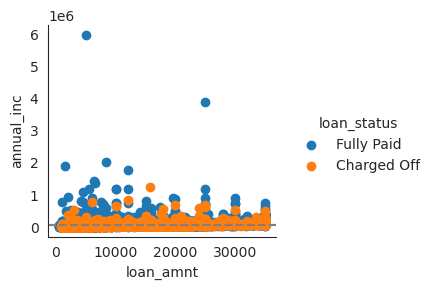

In [20]:
# Finding the purpose of loan affect the default

plt.figure(figsize=(10,5))
ax = sns.FacetGrid(loan_data, hue='loan_status')
ax.map(plt.scatter,'loan_amnt', 'annual_inc').add_legend();
ax.refline(y=loan_data["annual_inc"].median())
plt.show()